# Distributions
*September 3, 2019*

## Table of Contents
1. Questions to consider with distributions
   1. Central tendency
   1. Range for most of the data
   1. Bounds
1. Boxplot with Error Bars
1. Boxplot
   1. Use lab to modify titles
1. Histogram
   1. Modify bins with bins or binwidth argument
1. KDE
1. Rugs

In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3)

df = mpg %>%
    group_by(class) %>%
    summarize(mean_hwy = mean(hwy), sd_hwy = sd(hwy))

mpg.sorted = mpg %>%
    mutate(class.sorted = fct_reorder(class, hwy))

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Boxplot with Error Bars

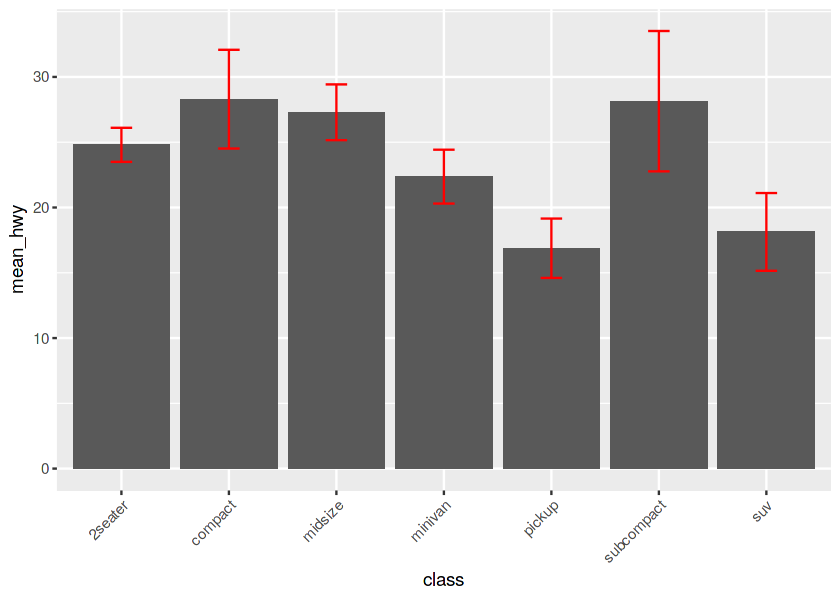

In [2]:
# Using df, created bar chart of class vs mean_hwy with error bars
# Top = mean_hwy - sd_hwy
# Bottom = mean_hwy + sd_hwy

# Central tendency indicated with mean
# Range isn't clear, especially since 0 has to be included
# No bounds

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(df, aes(x = class))
p = p + geom_bar(aes(y = mean_hwy), stat = 'identity')
p = p + geom_errorbar(aes(ymin = mean_hwy + sd_hwy, ymax = mean_hwy - sd_hwy),
                      color = 'red', width = 0.2)
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p

## Boxplot

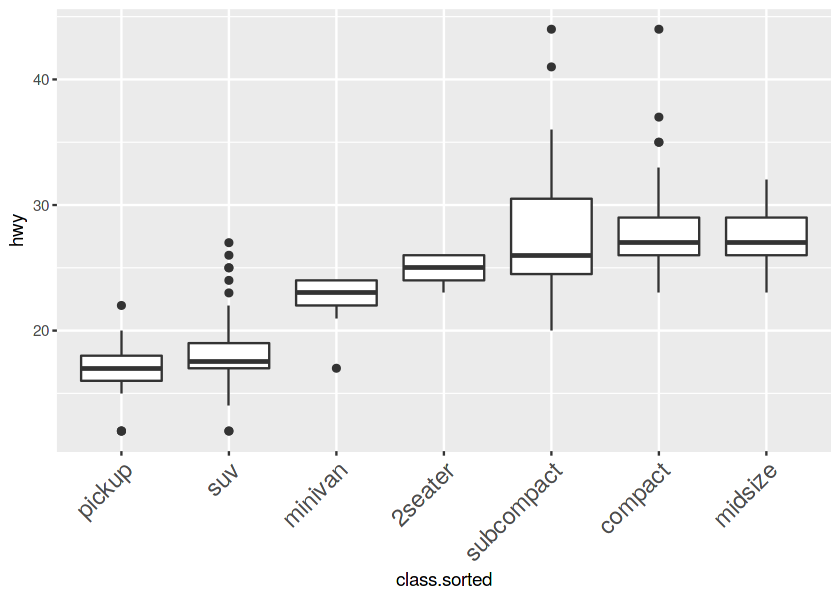

In [3]:
# Create boxplot by class of hwy

# Central tendency represented
# Range is represented
# And bounds!

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(mpg.sorted, aes(x = class.sorted, y = hwy))
p = p + geom_boxplot()
p = p + theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1))
p

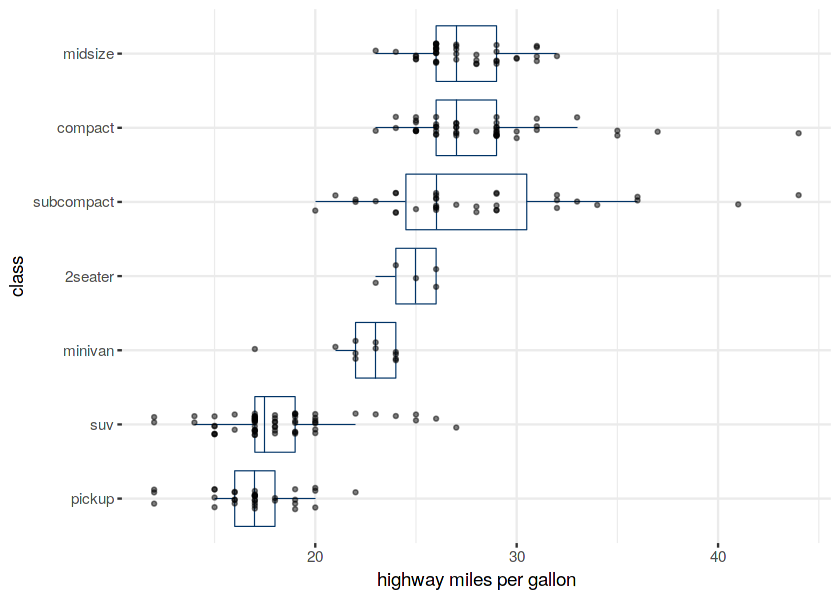

In [4]:
# Create horizontal boxplot with 
# transparent fill
# points with jitter
# transparency
# bw theme
# labs modifies your x and y axis titles

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(mpg.sorted, aes(x = class.sorted, y = hwy))
p = p + geom_boxplot(fill = NA, outlier.shape = NA, color = '#003366', fatten = 1, lwd = 0.25)
p = p + geom_point(position = position_jitter(h = 0, w = 0.15), size = 0.75, alpha = 0.5)
p = p + theme_bw()
p = p + theme(panel.border = element_blank())
p = p + labs(x = 'class', y = 'highway miles per gallon')
p = p + coord_flip()
p

## Histograms

In [9]:
diamonds %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


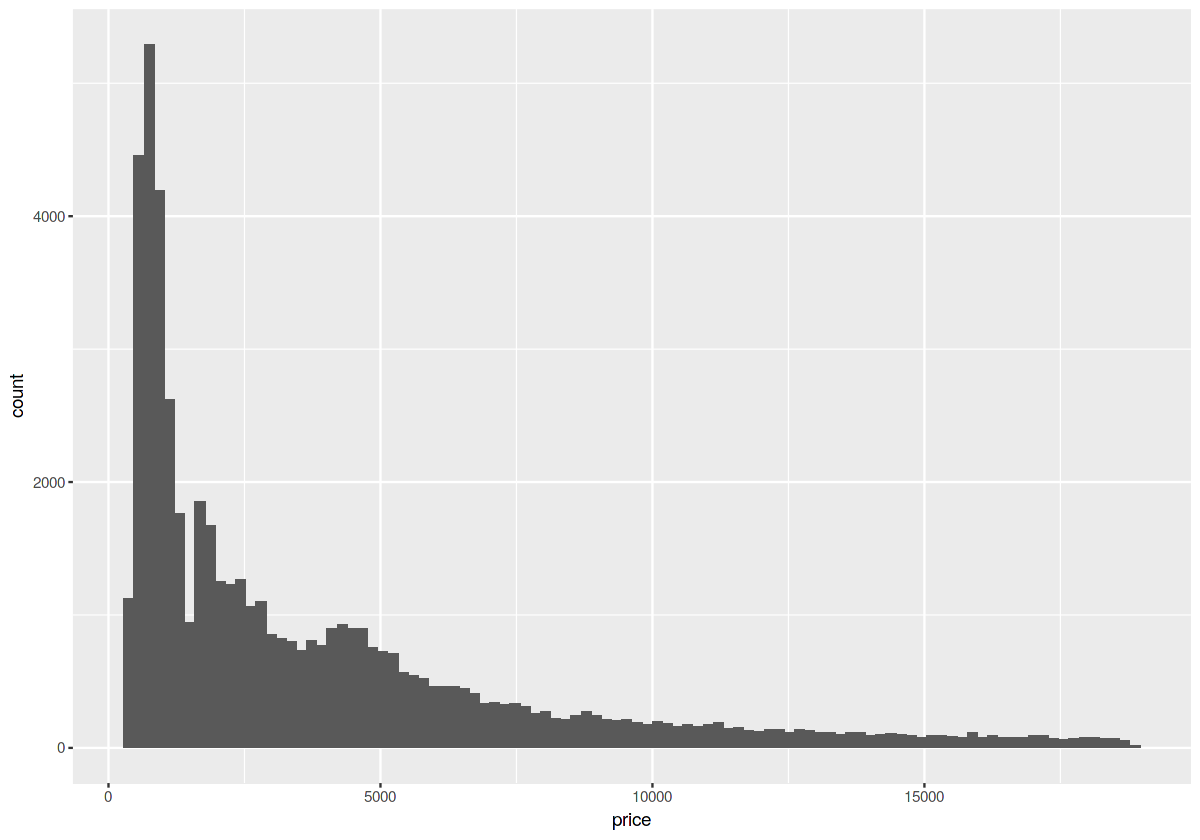

In [3]:
# Adjust bins with bins or binswidth arguments
# No y mapping needed

options(repr.plot.width=10, repr.plot.height=7)
p = ggplot(diamonds, aes(price))
p = p + geom_histogram(bins = 100)
p

## KDE

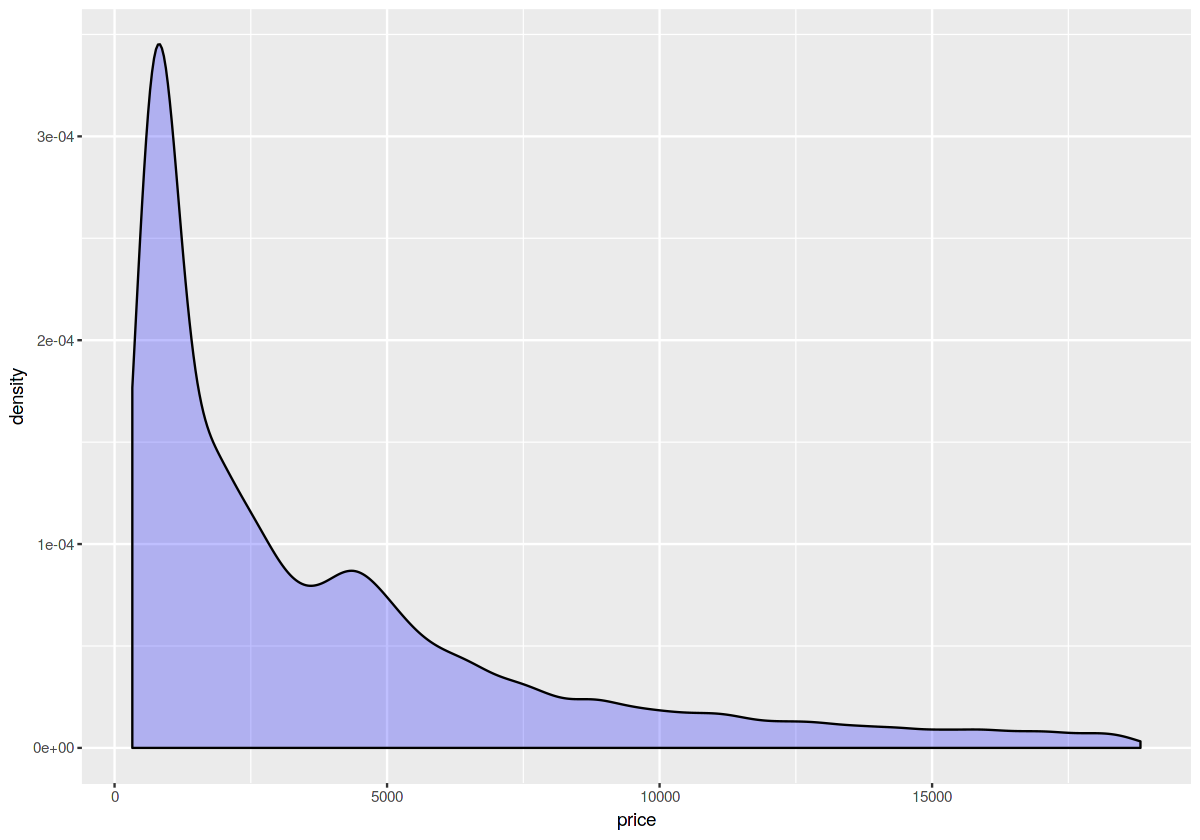

In [5]:
# No y mapping needed

p = ggplot(diamonds, aes(x = price))
p = p + geom_density(fill='blue', alpha=0.25)
p

## Rugs

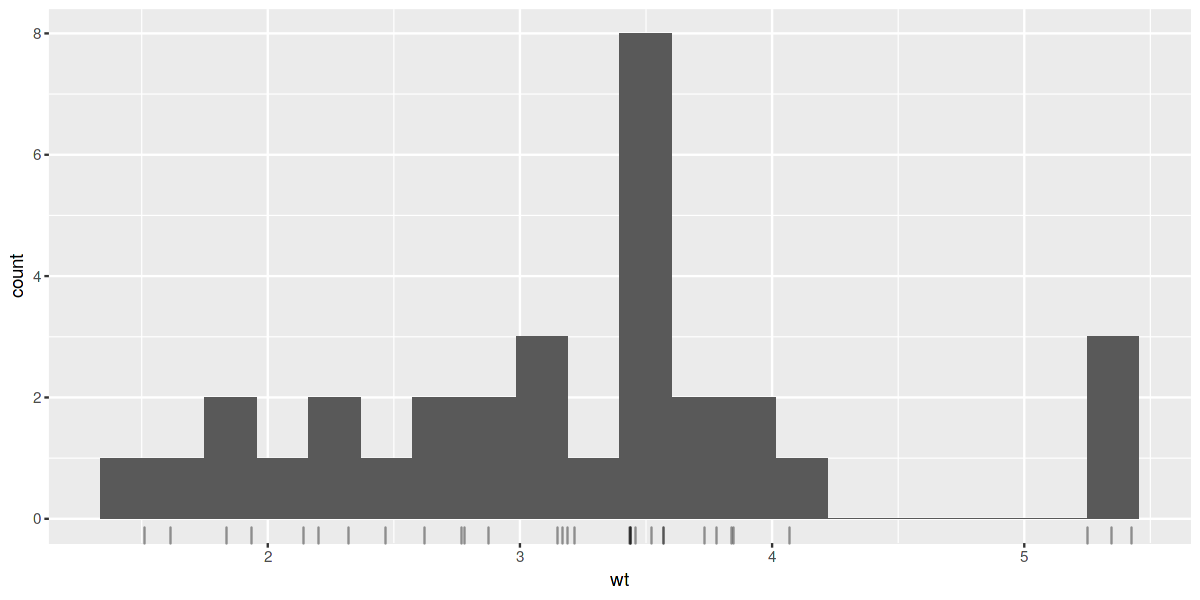

In [7]:
# Can help us include all values and see bounds.
# Not great with large number of points but you can adjust alpha.

options(repr.plot.width=10, repr.plot.height=5)
p = ggplot(mtcars, aes(x = wt))
p = p + geom_histogram(bins = 20)
p = p + geom_rug(alpha=0.4)
p